Welcome to the module on Advanced Regression. In this module, we will learn how to deal with variables which do not exhibit a linear relationship with the target variable. Furthermore, we will learn how to avoid the perils of overfitting and make a generalisable model.

Lets start off with a quick recap of simple linear regression. In the first example. we will try to model sales of an online retailer with the help of the marketing spend. Lets see how we go about it

In [ ]:
# importing the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

#### We will build a model using TV spend on advertisements to predict sales

In [ ]:
# Reading the dataset

df = pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/098bb2e9-83fb-48df-9dd1-fac56fbb25ca/advertising.csv')

In [ ]:
df.info()

In [ ]:
# Plotting a scatter plot

sns.scatterplot(df,x='TV',y='Sales')
plt.show()

In [ ]:
# Splitting the dataset into X and y

X = np.array(df['TV']).reshape(-1,1)
y = np.array(df['Sales']).reshape(-1,1)

In [ ]:
# Building the regression model
lm =LinearRegression()
lm.fit(X,y)

In [ ]:
# Predict the Sales value
y_pred = lm.predict(X)

In [ ]:
# Find the value of r squared
r2_score(y,y_pred)

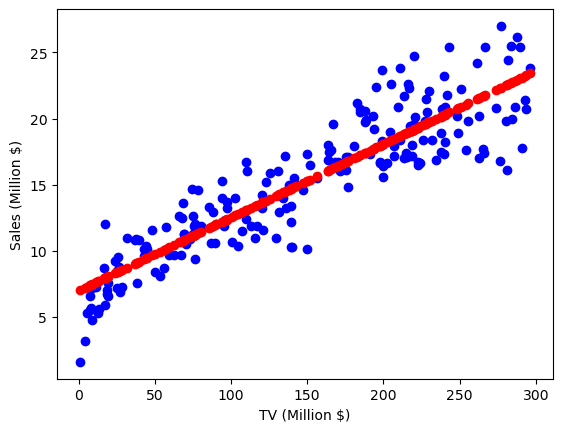

In [49]:
# Visualizing the model fit

plt.scatter(X,y,color = 'blue')
plt.scatter(X,y_pred,color='red',linewidth=1)
plt.xlabel("TV (Million $)")
plt.ylabel("Sales (Million $)")
plt.show()

In [50]:
# Model coefficients
print(lm.intercept_)
print(lm.coef_)

[6.97482149]
[[0.05546477]]


####  Linear regression model estimates using Normal Equations
#### Regression Equation
$\hat{y_i} = b_{0} + b_{1}{x_i}$<br>
where slope of trend line is calculated as:<br>
$b_{1}=\frac{\sum (x_i-\bar{x})*(y_i-\bar{y})}{\sum (x_i-\bar{x})^{2}}$<br>
and the intercept is computed as:<br>
$b_{0}=\bar{y}-b_{1}\bar{x}$

In [ ]:
X = df['TV'].values
Y = df['Sales'].values

#### Mean X and Mean y

In [ ]:
mean_X = np.mean(X)
mean_y = np.mean(Y)

In [ ]:
# Total no of X
n = len(X)

In [ ]:
# Using the expression calculcate b0 and b1
numer = 0
denom = 0

for i in range(n):
    numer +=(X[i] - mean_X)*(Y[i] - mean_y)
    denom += (X[i] - mean_X) **2
b1 = numer / denom    
b0 = mean_y - b1 * mean_X
print(b0 ,b1)

In [ ]:
# Numpy representation of Matrix

A = np.array([[1,2],
             [4,5]])

B = np.array([[10,11],
             [5,6]])
print(np.dot(A,B))

In [ ]:
# Transpose of matrix
print(A.T)

In [ ]:
X = np.array([
    [4,2,5],
    [3,2,8],
    [5,2,9],
    [7,2,1]
])

X1 = X.T
print(X1)
print(np.dot(X,X1))

In [ ]:
A = np.array([[2, 1, -1], 
              [1, 0, -1], 
              [-2, 0, 1]])

np.linalg.inv(A)

In [ ]:
print(np.dot(A, np.linalg.inv(A)))

### Linear regression model estimates using Matrix Multiplication
$\widehat{\beta}=(X^{T}.X)^{-1}.X^{T}.Y$

In [ ]:
X = np.array(df['TV']).reshape(-1,1)
Y = np.array(df['Sales']).reshape(-1,1)

In [ ]:
X.shape

In [ ]:
# Create a (200,1) one array
one_array = np.ones(shape=(200,1))
one_array

In [ ]:
# use v stack between X and one_array
X_mat = np.hstack((one_array,X))
X_mat

In [ ]:
# Calculate the X transpose
X_transpose = X_mat.T
X_transpose

In [ ]:
# Calculate the dot product between X_transpose and X_mat

product = np.dot(X_transpose,X_mat)
product

In [ ]:
# Calculate the inverse of the product

product_inv = np.linalg.inv(product)
product_inv

In [48]:
# Finally calculate beta

beta = product_inv.dot(X_transpose).dot(Y)
beta

array([[6.97482149],
       [0.05546477]])

### Linear Regression Assumption Validation 
---
>   1. We will check if the error vs predicted values are scattered homogeniously withing a horizontal band
>   2. We will check if the error is normally distributed

Text(0, 0.5, 'residual')

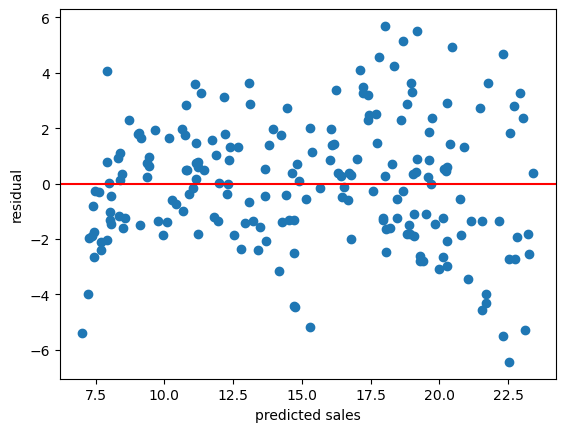

In [61]:
y = np.array(df['Sales']).reshape(-1,1)
y.shape
error = y - y_pred
plt.scatter(y_pred,error)
plt.axhline(y=0,color = 'r')
plt.xlabel('predicted sales')
plt.ylabel('residual')

Text(0.5, 0, 'residual')

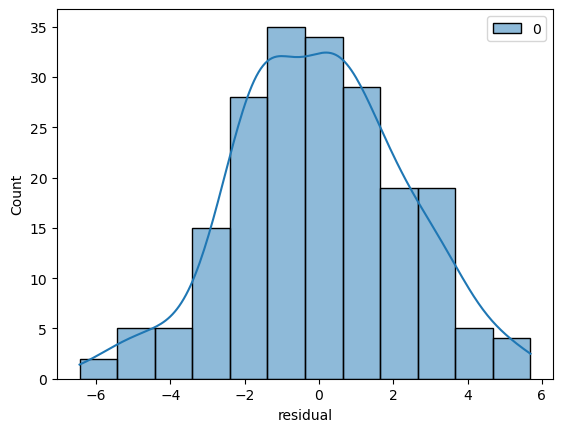

In [64]:
sns.histplot(error,kde=True)
plt.xlabel('residual')

### Multiple Linear Regression Model building and Linear Regression Assumption Verification

In [65]:
# Get X and y
y = df.pop('Sales')
X = df

In [66]:
print(y.shape)
print(X.shape)

(200,)
(200, 3)


In [67]:
# Build the model
model = LinearRegression()
model.fit(X,y)
model.coef_

array([0.05444578, 0.10700123, 0.00033566])

In [69]:
# Model prediction
y_pred = model.predict(X)

# Metrices r2 score
print(r2_score(y,y_pred))


0.9025912899684558


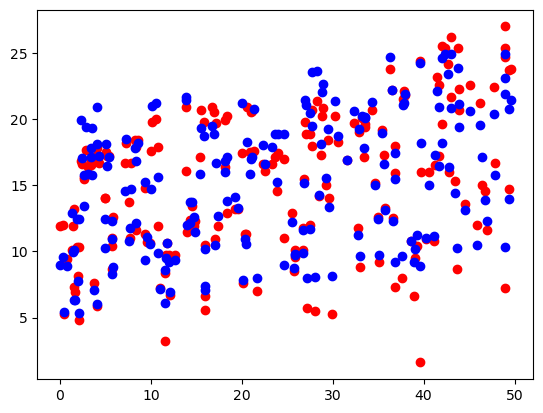

In [81]:
# Scatter plot between the y and y_pred


plt.scatter(X['Radio'],y,color = 'r')
plt.scatter(X['Radio'],y_pred,color = 'b')

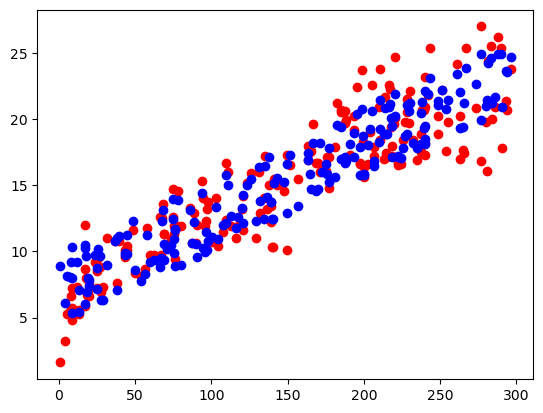

In [82]:
# Scatter plot between the y and y_pred


plt.scatter(X['TV'],y,color = 'r')
plt.scatter(X['TV'],y_pred,color = 'b')

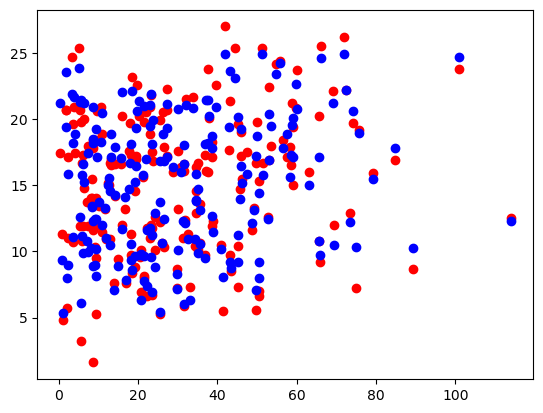

In [85]:
# Scatter plot between the y and y_pred


plt.scatter(X['Newspaper'],y,color = 'r')
plt.scatter(X['Newspaper'],y_pred,color = 'b')

In [88]:
# Overall metrices
rss = np.sum(np.square(y-y_pred))
print(rss)

mse = mean_squared_error(y,y_pred)
print(mse)

rmse = np.sqrt(mse)
print(rmse)

541.2012295254631
2.706006147627315
1.6449942697855562


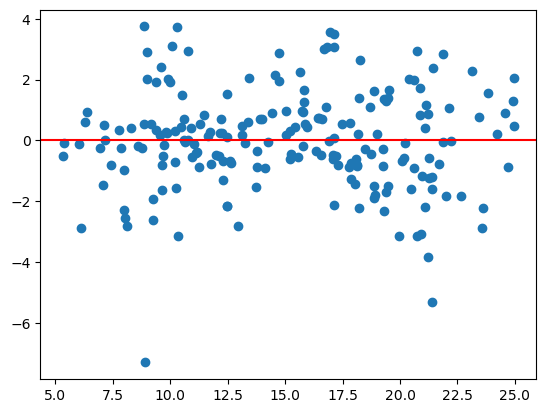

In [90]:
# Residual Analysis
res = y-y_pred
plt.scatter(y_pred,res)
plt.axhline(color = 'r')

<Axes: xlabel='Sales', ylabel='Count'>

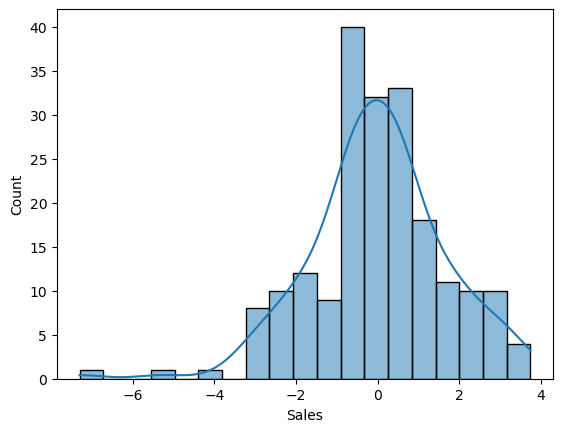

In [91]:
sns.histplot(res,kde=True)